In [2]:
import HYuPlot as hyuplt 
import FerrersModel as ferrers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#E_J=-.75, y0=-1.65 (LSR?)
#-.72;-1.65 (Hyades)
#-.67;-1.85 (Hyades) 
#-.65;-2.18 -4:1 group 
#-.75;-2 -4:1
#-.8;-2.2 outer disk: Arch/Hat

# How about Horn?
# Most of these orbits are symmetric, what caused teh asymmetry in Horn/Sirius

#Theory: 
# -4:1 QPO groups form Hyades
# Asymmetry in Sirius: -4:1 at lower E_J? #not certain
# LSR/Coma: Outer Circular
# 

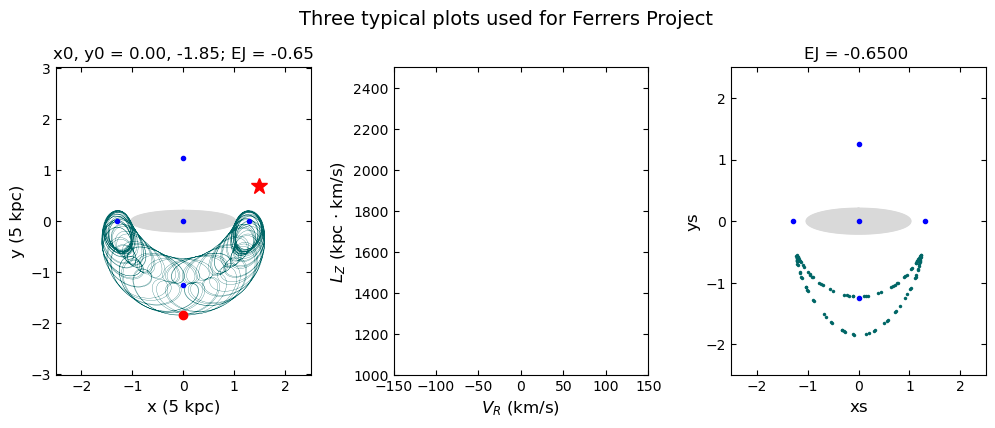

In [10]:
# Let's make some plots about our orbits 
# creat a 1x3 grid
plot=hyuplt.PlotGrid(figsize=(4,12),gridshape=(1,3))
plot.wspace=.325 #allow some extra wspace for labels

# Let's be simple, just one subplot per gridpoint
plot.GetAXS()
plot.xlabel=None
plot.ylabel=None
plot.title='Three typical plots used for Ferrers Project'
plot.FigLabel()

# get the axs
axs=plot.axs

# define the initial condition with EJ
init=ferrers.InitialCondition(ej=-.65,y0=-1.85)
init.InitFromEj()
# print(init)

# Get an instance from orbitplot
orbitplot=ferrers.PlotFerrers(init=init)

# plot the orbit in the XY plane in the first subplot
ax=axs[0]
# integrate orbit
# orbitplot.orbit.tmax=10000
orbitplot.GetOrbit()
# plot the XY plane
orbitplot.PlotXY(linewidth=.2,ax=ax)
# plot the sun and SNd passing orbits
orbitplot.PlotSNd(ax=ax,markersize=12)

# plot the SNd-LzVr in the second subplot (M2K)
ax=axs[1]
Lz_Nd,vr_Nd=orbitplot.PlotM2K(ax=ax) 
# Usually we do this on top of the LzVr density in the solar neighbourhood

# plot the surface of secation of this orbit in the third plot
ax=axs[2]
xs,ys=orbitplot.PlotSOS(ax=ax,label="hyades-related")


# # #################################
# # define the initial condition with EJ
# init=ferrers.InitialCondition(ej=-.72,y0=-1.6)
# init.InitFromEj()
# # print(init)

# # Get an instance from orbitplot
# orbitplot=ferrers.PlotFerrers(init=init)

# # plot the orbit in the XY plane in the first subplot
# ax=axs[0]
# # integrate orbit
# # orbitplot.orbit.tmax=10000
# orbitplot.GetOrbit()
# # plot the XY plane
# orbitplot.PlotXY(linewidth=.2,ax=ax)
# # plot the sun and SNd passing orbits
# orbitplot.PlotSNd(ax=ax,markersize=12)

# # plot the SNd-LzVr in the second subplot (M2K)
# ax=axs[1]
# Lz_Nd,vr_Nd=orbitplot.PlotM2K(ax=ax) 
# # Usually we do this on top of the LzVr density in the solar neighbourhood

# # plot the surface of secation of this orbit in the third plot
# ax=axs[2]
# xs,ys=orbitplot.PlotSOS(ax=ax,color="red",label="Trojan")

# # #################################
# # define the initial condition with EJ
# init=ferrers.InitialCondition(ej=-.72,y0=-2)
# init.InitFromEj()
# # print(init)

# # Get an instance from orbitplot
# orbitplot=ferrers.PlotFerrers(init=init)

# # plot the orbit in the XY plane in the first subplot
# ax=axs[0]
# # integrate orbit
# # orbitplot.orbit.tmax=10000
# orbitplot.GetOrbit()
# # plot the XY plane
# orbitplot.PlotXY(linewidth=.2,ax=ax)
# # plot the sun and SNd passing orbits
# orbitplot.PlotSNd(ax=ax,markersize=12)

# # plot the SNd-LzVr in the second subplot (M2K)
# ax=axs[1]
# Lz_Nd,vr_Nd=orbitplot.PlotM2K(ax=ax) 
# # Usually we do this on top of the LzVr density in the solar neighbourhood

# # plot the surface of secation of this orbit in the third plot
# ax=axs[2]
# xs,ys=orbitplot.PlotSOS(ax=ax,color="cyan",label="4:1")
# ax.axis('equal')
# ax.legend()
